## Assignment: $k$ Means Clustering

## **Do two questions.**

## **Ok I did q1 and q2.**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalidf2e the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
    > Cluster 2 has the highest average price at about $300/night.
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
    > I used 3 clusters and Culster 2 still has the highest average price, but is lower at about $200/night.

In [42]:
df = pd.read_csv('./data/airbnb_hw.csv').loc[:, ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']]

In [43]:
# df.describe()
# df['Price'].value_counts()
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Beds'] = df['Beds'].fillna(1)
df = df.dropna()
df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [44]:
def maxmin(x):
    return (x - min(x)) / (max(x) - min(x))

In [46]:
df2 = df.drop('Price', axis = 1)
df2 = df.apply(maxmin)

In [47]:
model = KMeans(n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(df2)

In [48]:
df2['cluster'] = model.labels_

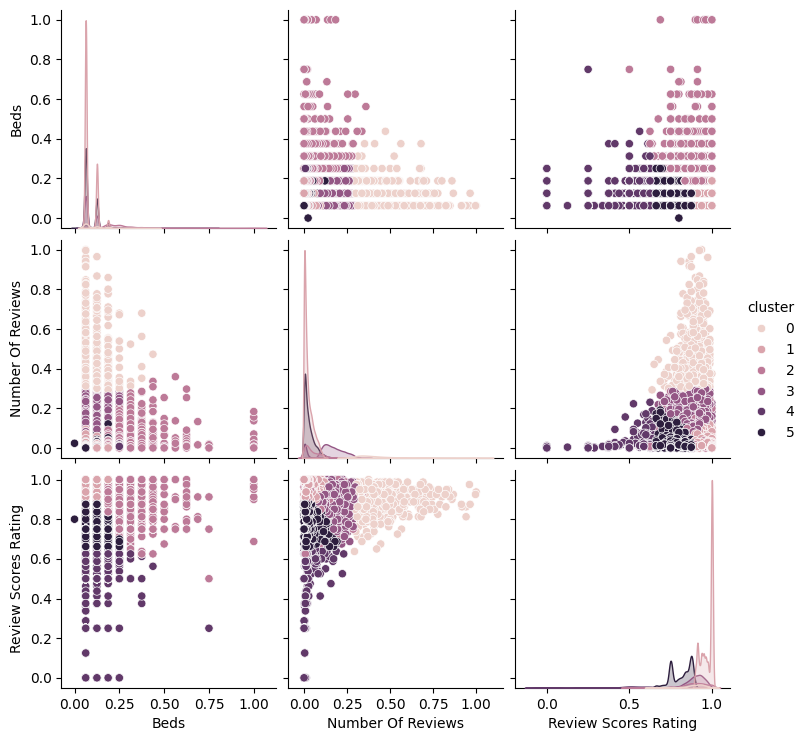

In [50]:
sns.pairplot(data = df2.drop('Price', axis = 1), hue = 'cluster')

In [51]:
df['cluster'] = model.labels_
df.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          794.0  133.238035   83.077776  27.0   80.0  110.0  168.50    875.0
1        10517.0  150.631454  106.580769  10.0   85.0  130.0  190.00   3500.0
2         1628.0  304.552211  364.252756  27.0  150.0  235.0  360.00  10000.0
3         3017.0  141.458734   83.897138  22.0   87.0  125.0  175.00   1000.0
4          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
5         5567.0  131.546434  102.551388  20.0   75.0  110.0  169.00   5000.0

In [53]:
k_bar = 10
k_grid = np.arange(1, k_bar + 1)
SSE = np.zeros(k_bar)

In [54]:
for k in range(k_bar):
    model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0) 
    model = model.fit(df2) 
    SSE[k] = model.inertia_ 

Text(0.5, 1.0, 'Scree Plot')

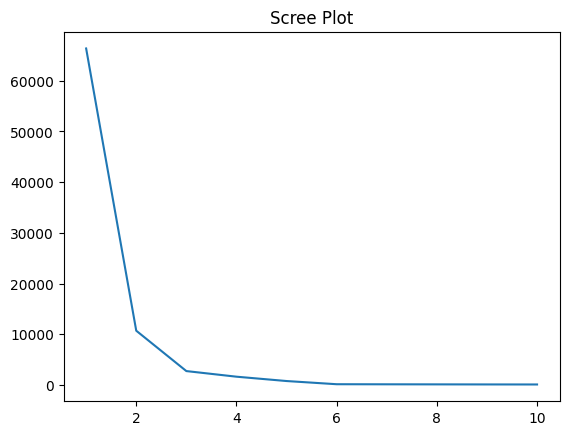

In [55]:
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [56]:
model = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0) 
model = model.fit(df2)
df2['cluster'] = model.labels_

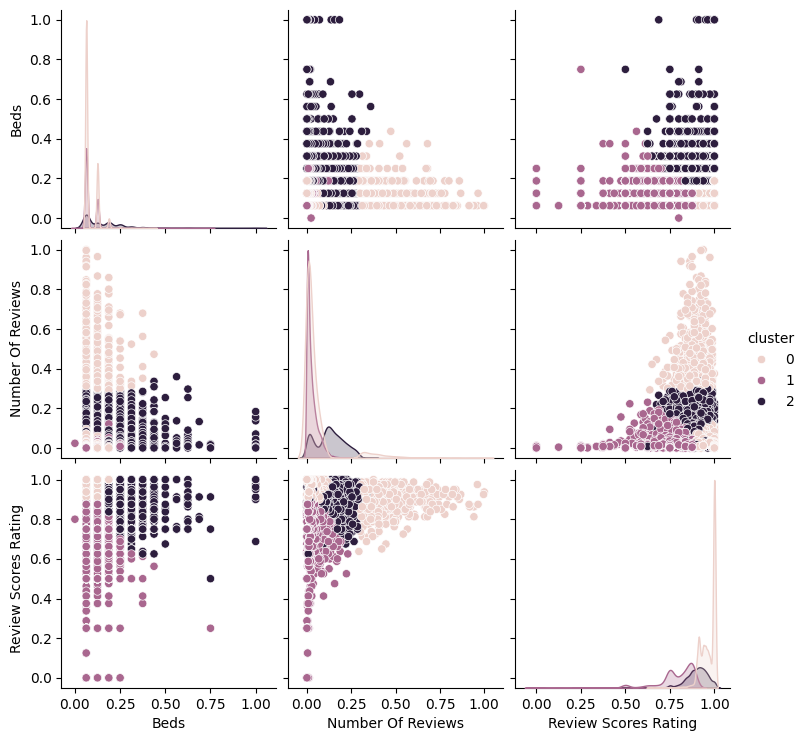

In [58]:
sns.pairplot(data = df2.drop('Price', axis = 1), hue = 'cluster')

In [60]:
df['cluster'] = model.labels_
df.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        11311.0  149.410485  105.193457  10.0  85.0  129.0  189.0   3500.0
1         6199.0  131.754477  119.050313  20.0  75.0  110.0  169.0   5000.0
2         4645.0  198.620452  238.980158  22.0  99.0  150.0  225.0  10000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

    > As the noise goes up, the clusters grow larger and larger in size until they start to overlap, which makes it harder to distinguish which cluster each point belongs to.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

    > As the level of noise increases, the presence of a clear elbow diminishes, which decreases my ability to definitively select a $k$.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

    > The clarity of the elbow in the plots diminishes as the level of noise goes up and the groups begin to overlap. This means that a less visible elbow can be indicative of a sample of clusters that are not distinct from one another; therefore, the $k$ means clustering algorithm may produce inaccurate predictions determining which group a given point should belong to. However, if there is a clear and visible elbow, then that means the $k$ means algorithm can produce accurate predictions when determining which group a given point should belong to.

In [61]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

In [62]:
df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

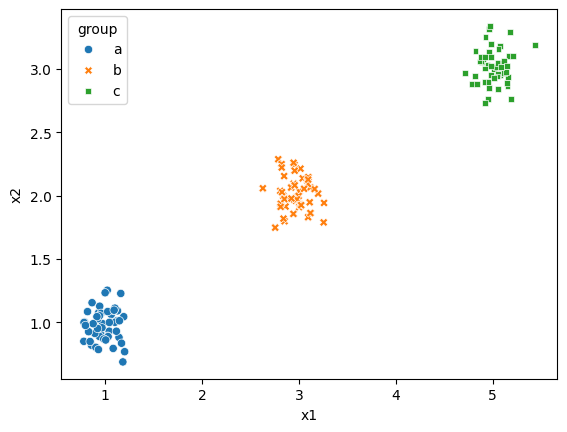

In [63]:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

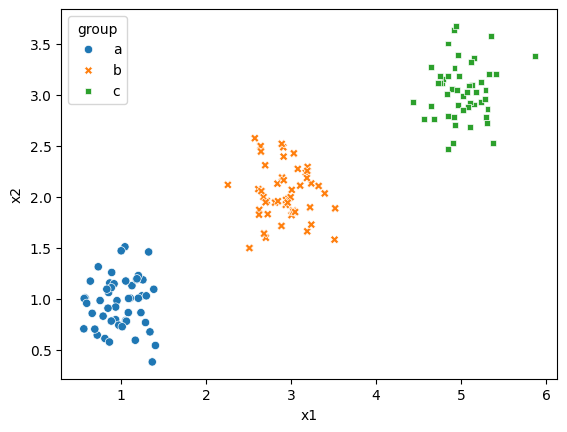

In [64]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

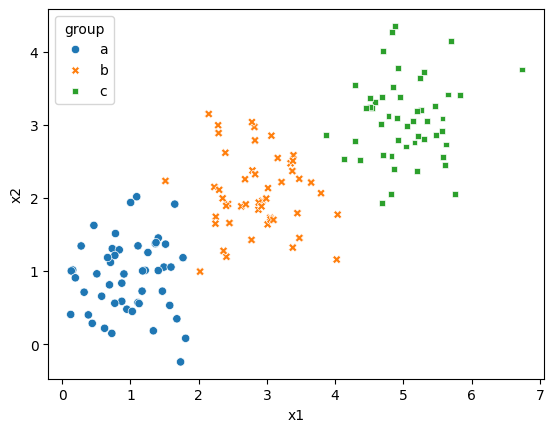

In [65]:
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

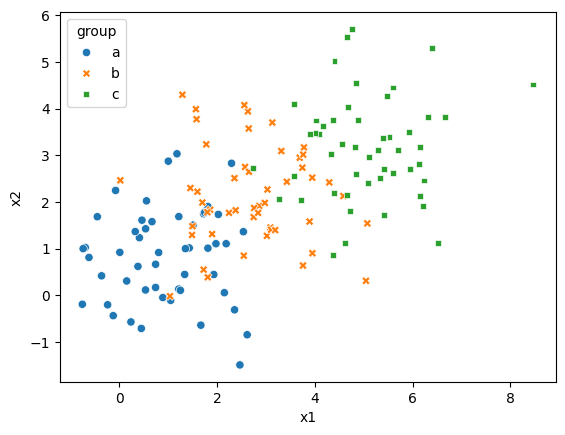

In [66]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

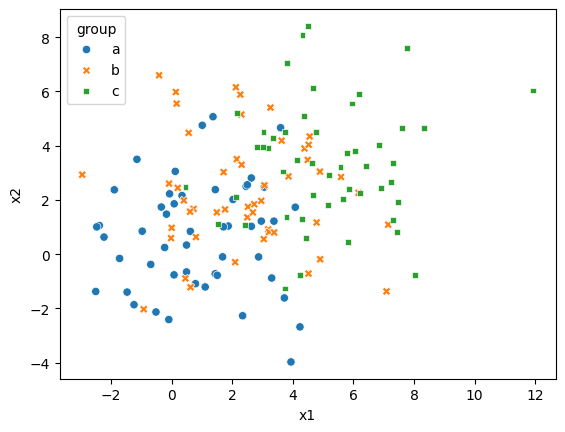

In [67]:
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

In [77]:
def scree(data): 
    df3 = data.loc[:, ['x1', 'x2']]
    df3 = df3.apply(maxmin)
    k_bar = 10
    k_grid = np.arange(1, k_bar + 1)
    SSE = np.zeros(k_bar)

    for k in range(k_bar):
        model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
        model = model.fit(df3)
        SSE[k] = model.inertia_

    scree_plot, axes = plt.subplots()
    sns.lineplot(x = k_grid, y = SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)

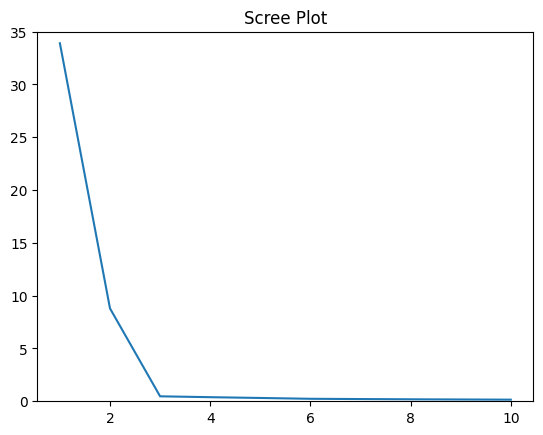

In [78]:
scree(df0_125)

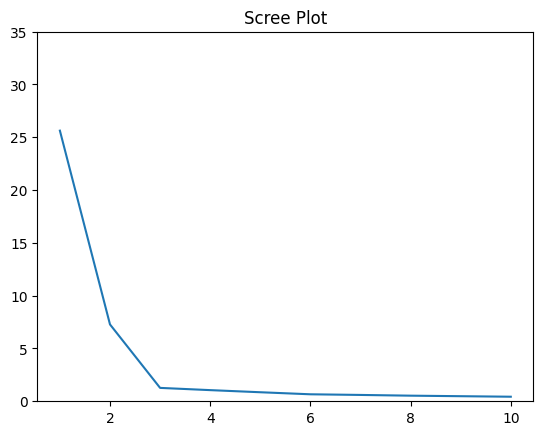

In [73]:
scree(df0_25)

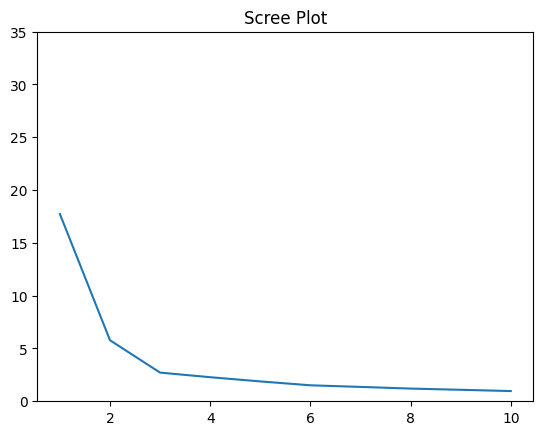

In [74]:
scree(df0_5)

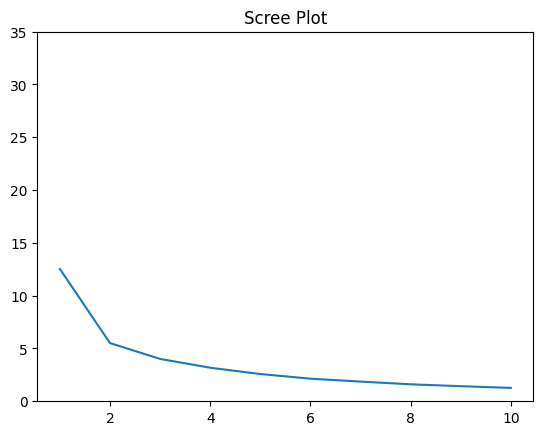

In [75]:
scree(df1_0)

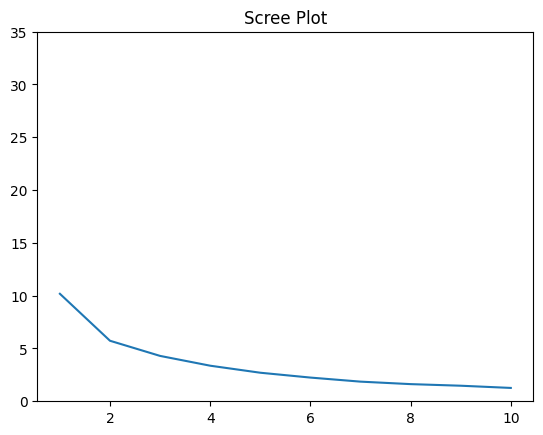

In [76]:
scree(df2_0)

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualidf2e this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?